In [ ]:
Reiners Tumelo Ezekiel

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("all_kindle_review .csv")

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [4]:
column_to_drop = ["Unnamed: 0.1","Unnamed: 0","unixReviewTime"]
df.drop(columns = column_to_drop, inplace = True)
df.to_csv("all_kindle_review .csv", index = False)

df['reviewTime'] = pd.to_datetime(df['reviewTime'])  # Convert to datetime

df.head(15)

,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary
0,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...",2010-09-02,A3HHXRELK8BHQG,Ridley,Entertaining But Average
1,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,2013-10-08,A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!
2,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,2014-04-11,A3S0H2HV6U1I7F,Merissa,Snapdragon Alley
3,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,2014-07-05,AC4OQW3GZ919J,Cleargrace,very light murder cozy
4,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,2012-12-31,A3C9V987IQHOQD,Rjostler,Book
5,B0021L9YDK,"[6, 6]",5,Aislinn is a little girl with big dreams. Afte...,2009-12-07,A3J5NN6MJK4M4A,"Aubrie A. Dionne ""Fantasy, Sci Fi Author""",A story of a little girl with big dreams.
6,B0038NN38W,"[1, 1]",2,This has the makings of a good story... unfort...,2011-08-18,A531QY5K7JVXI,Chicano,This story has potential but ultimately disapp...
7,B002AJ7X2C,"[1, 1]",4,I got this because I like collaborated short s...,2010-03-08,AN8ELR6AHMMQ,"Jessss ""I read to find stories that inspire m...",Good thriller
8,B001L5T22U,"[0, 0]",5,"Loved this book, I am hooked on this series an...",2013-09-30,AMSWCFSQ8SLK9,Amazon Customer,Loved it!
9,B002F3PPVE,"[0, 1]",4,"And that's a good thing. Short, sweet tease th...",2009-07-29,AB53C7GYZHYIE,"A. Williams ""blkkat""",I was scared...


In [5]:
df.describe()

,rating,reviewTime
count,12000.000000,12000
mean,3.250000,2012-08-09 18:29:09.600000
min,1.000000,2000-06-06 00:00:00
25%,2.000000,2011-09-17 00:00:00
50%,3.500000,2012-12-30 00:00:00
75%,4.250000,2013-08-19 00:00:00
max,5.000000,2014-07-20 00:00:00
std,1.421619,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   asin          12000 non-null  object        
 1   helpful       12000 non-null  object        
 2   rating        12000 non-null  int64         
 3   reviewText    12000 non-null  object        
 4   reviewTime    12000 non-null  datetime64[ns]
 5   reviewerID    12000 non-null  object        
 6   reviewerName  11962 non-null  object        
 7   summary       11998 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 750.1+ KB


In [7]:
df.isna().sum()

asin             0
helpful          0
rating           0
reviewText       0
reviewTime       0
reviewerID       0
reviewerName    38
summary          2
dtype: int64

In [8]:
custom_string = 'Unknown Reviewer'
df["reviewerName"].fillna(custom_string, inplace=True)
df.to_csv("all_kindle_review .csv", index = False)

custom_string = 'Unkown'
df["summary"].fillna(custom_string, inplace=True)
df.to_csv("all_kindle_review .csv", index = False)
df.head()

C:\Users\202215553\AppData\Local\Temp\ipykernel_19204\2201500432.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviewerName"].fillna(custom_string, inplace=True)
C:\Users\202215553\AppData\Local\Temp\ipykernel_19204\2201500432.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary
0,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...",2010-09-02,A3HHXRELK8BHQG,Ridley,Entertaining But Average
1,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,2013-10-08,A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!
2,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,2014-04-11,A3S0H2HV6U1I7F,Merissa,Snapdragon Alley
3,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,2014-07-05,AC4OQW3GZ919J,Cleargrace,very light murder cozy
4,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,2012-12-31,A3C9V987IQHOQD,Rjostler,Book


In [9]:
df.isna().sum()

asin            0
helpful         0
rating          0
reviewText      0
reviewTime      0
reviewerID      0
reviewerName    0
summary         0
dtype: int64

In [10]:

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiments for 'summary' and 'reviewText'
df['summary_sentiment'] = df['summary'].apply(lambda x: sia.polarity_scores(x))
df['review_sentiment'] = df['reviewText'].apply(lambda x: sia.polarity_scores(x))

# Extract compound scores
df['summary_compound'] = df['summary_sentiment'].apply(lambda x: x['compound'])
df['review_compound'] = df['review_sentiment'].apply(lambda x: x['compound'])

# Define sentiment label function
def get_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Create sentiment labels
df['summary_label'] = df['summary_compound'].apply(get_sentiment_label)
df['review_label'] = df['review_compound'].apply(get_sentiment_label)

# Save to CSV
df.to_csv('kindle_reviews.csv', index=False)

# Display sentiment counts
df.head()


,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,summary_sentiment,review_sentiment,summary_compound,review_compound,summary_label,review_label
0,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...",2010-09-02,A3HHXRELK8BHQG,Ridley,Entertaining But Average,"{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'comp...","{'neg': 0.129, 'neu': 0.708, 'pos': 0.163, 'co...",0.2382,0.9559,Positive,Positive
1,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,2013-10-08,A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,"{'neg': 0.0, 'neu': 0.371, 'pos': 0.629, 'comp...","{'neg': 0.044, 'neu': 0.673, 'pos': 0.283, 'co...",0.5255,0.9645,Positive,Positive
2,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,2014-04-11,A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",0.0000,0.8555,Neutral,Positive
3,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,2014-07-05,AC4OQW3GZ919J,Cleargrace,very light murder cozy,"{'neg': 0.624, 'neu': 0.376, 'pos': 0.0, 'comp...","{'neg': 0.078, 'neu': 0.851, 'pos': 0.07, 'com...",-0.7165,-0.1280,Negative,Negative
4,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,2012-12-31,A3C9V987IQHOQD,Rjostler,Book,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","{'neg': 0.0, 'neu': 0.861, 'pos': 0.139, 'comp...",0.0000,0.4404,Neutral,Positive


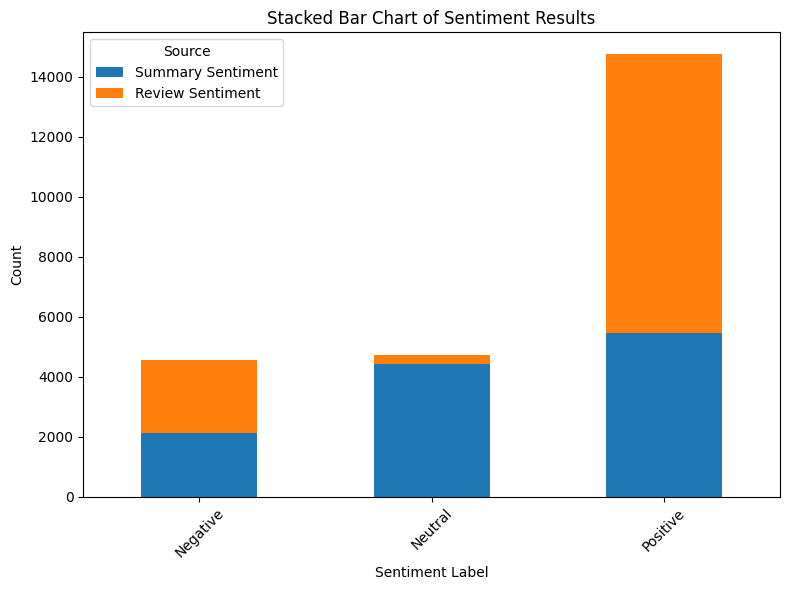

In [11]:
# Group data for 'summary_label' and 'review_label'
summary_counts = df['summary_label'].value_counts()
review_counts = df['review_label'].value_counts()

# Combine the counts into a DataFrame for plotting
stacked_data = pd.DataFrame({
    'Summary Sentiment': summary_counts,
    'Review Sentiment': review_counts
}).fillna(0)  # Fill missing values with 0

# Plot the stacked bar chart
stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color=['#1f77b4', '#ff7f0e', '#2ca02c']  # Custom colors for the bars
)

# Add chart details
plt.title('Stacked Bar Chart of Sentiment Results')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Source', loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

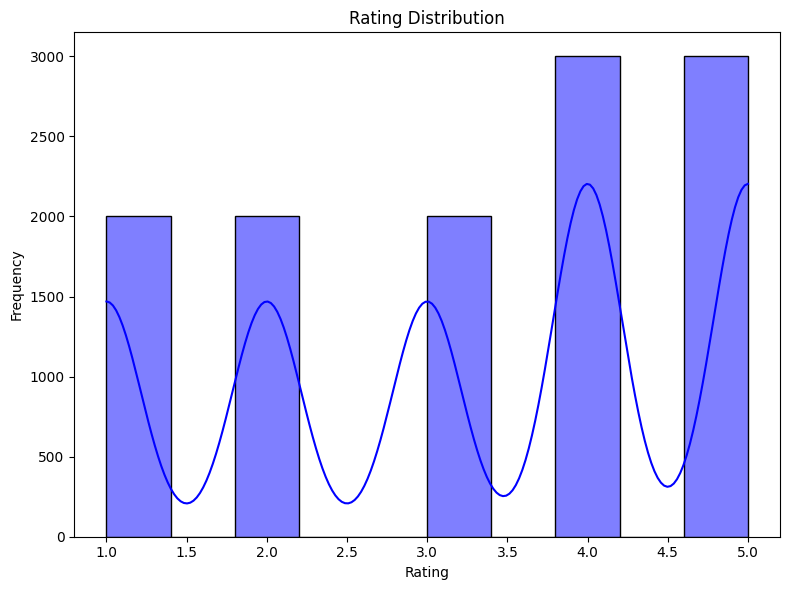

In [12]:
# Check if 'rating' column exists
if 'rating' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df['rating'], bins=10, kde=True, color='blue')
    plt.title('Rating Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("No 'rating' column found in the dataset.")


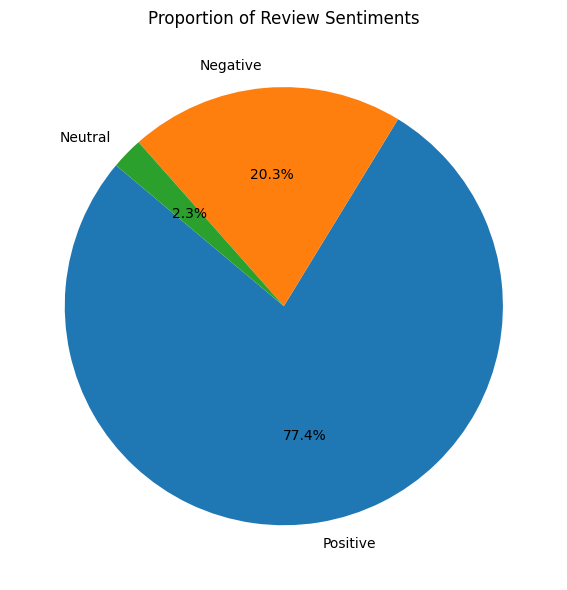

In [13]:
# Pie chart for review sentiments
review_label_counts = df['review_label'].value_counts()

plt.figure(figsize=(8, 6))
review_label_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Proportion of Review Sentiments')
plt.ylabel('')  # Remove y-label for aesthetics
plt.tight_layout()
plt.show()


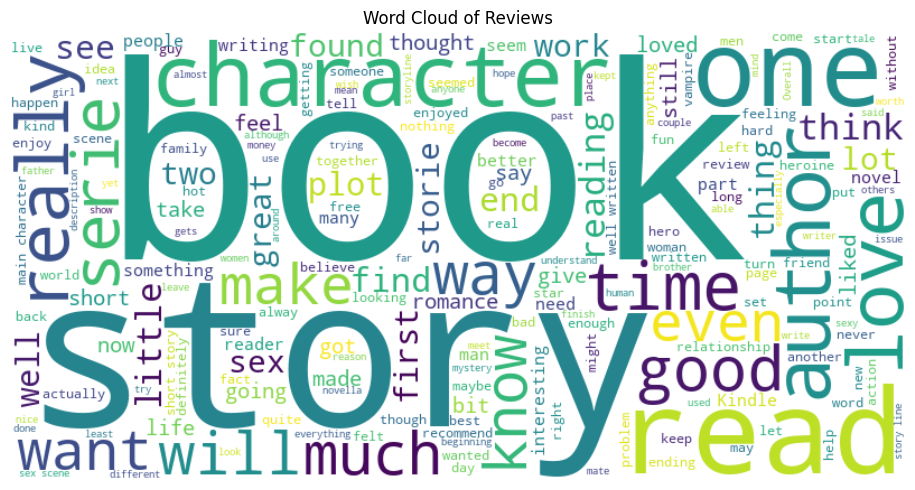

In [14]:
# Combine all reviewText into one string
review_text = " ".join(df['reviewText'].dropna())

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(review_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.tight_layout()
plt.show()


C:\Users\202215553\AppData\Local\Temp\ipykernel_19204\294608708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_label', y='rating', data=df, palette='Set2')


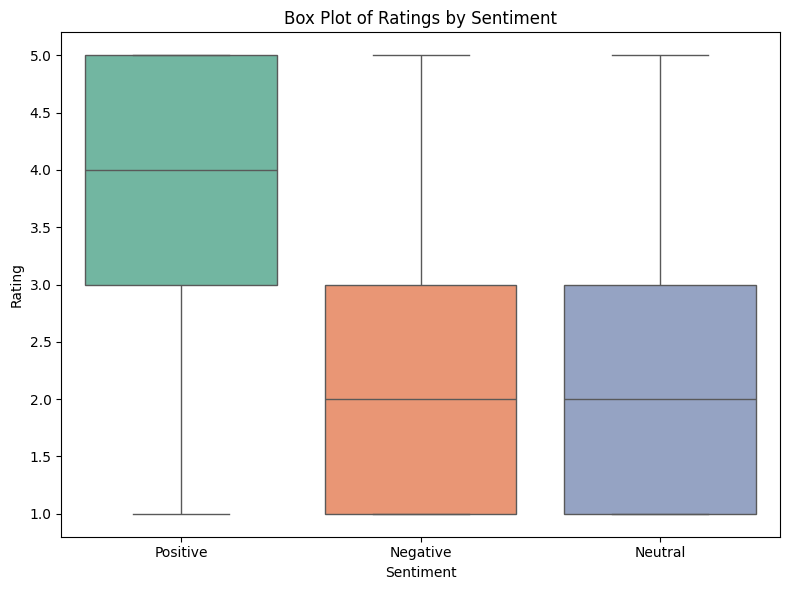

In [15]:
# Check if 'rating' and 'review_label' columns exist
if 'rating' in df.columns and 'review_label' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='review_label', y='rating', data=df, palette='Set2')
    plt.title('Box Plot of Ratings by Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Rating')
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'rating' or 'review_label' not found in the dataset.")


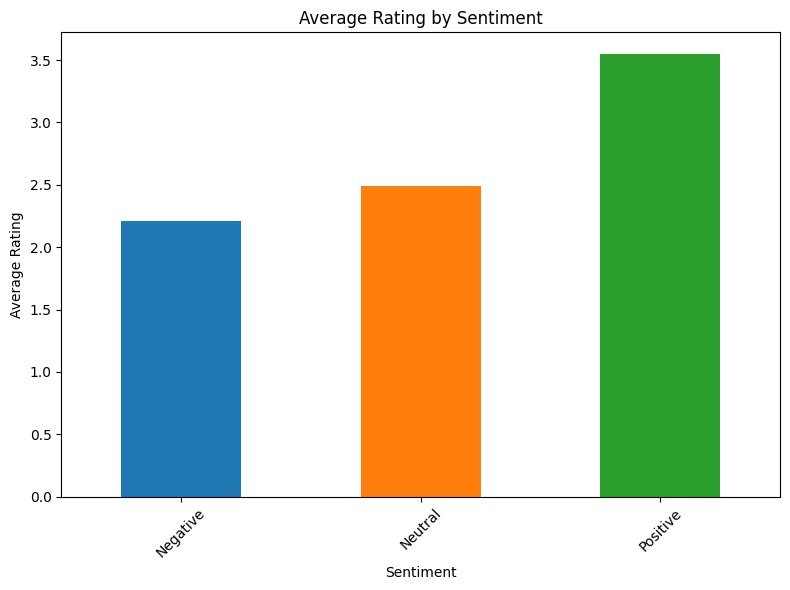

In [16]:
# Group by sentiment and calculate average rating
if 'rating' in df.columns and 'review_label' in df.columns:
    avg_rating_by_sentiment = df.groupby('review_label')['rating'].mean()

    plt.figure(figsize=(8, 6))
    avg_rating_by_sentiment.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.title('Average Rating by Sentiment')
    plt.xlabel('Sentiment')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'rating' or 'review_label' not found in the dataset.")


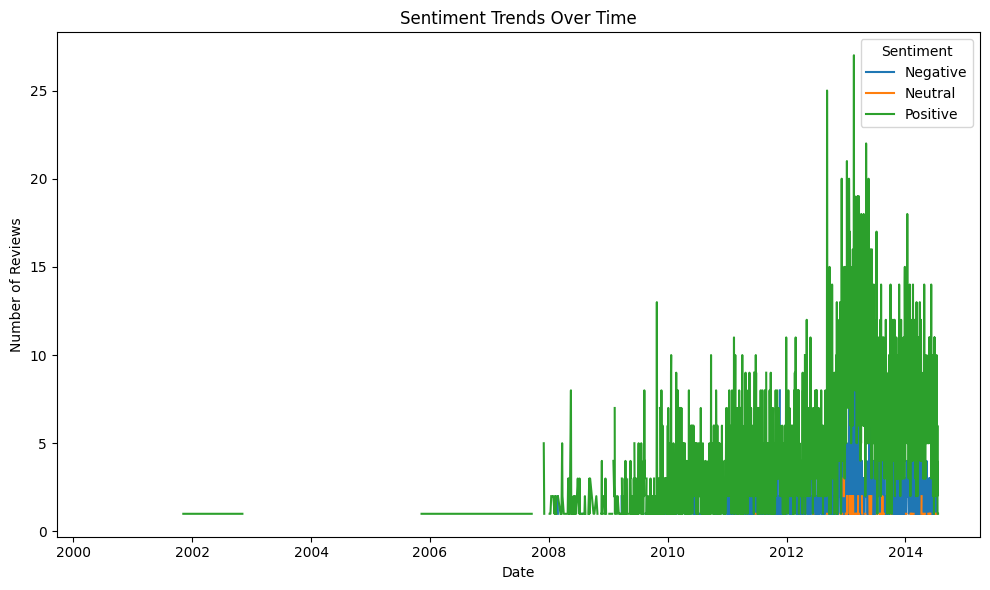

In [17]:
if 'reviewTime' in df.columns and 'review_label' in df.columns:
    sentiment_trends = df.groupby([df['reviewTime'].dt.date, 'review_label']).size().unstack()

    sentiment_trends.plot(kind='line', figsize=(10, 6))
    plt.title('Sentiment Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'reviewTime' or 'review_label' not found in the dataset.")


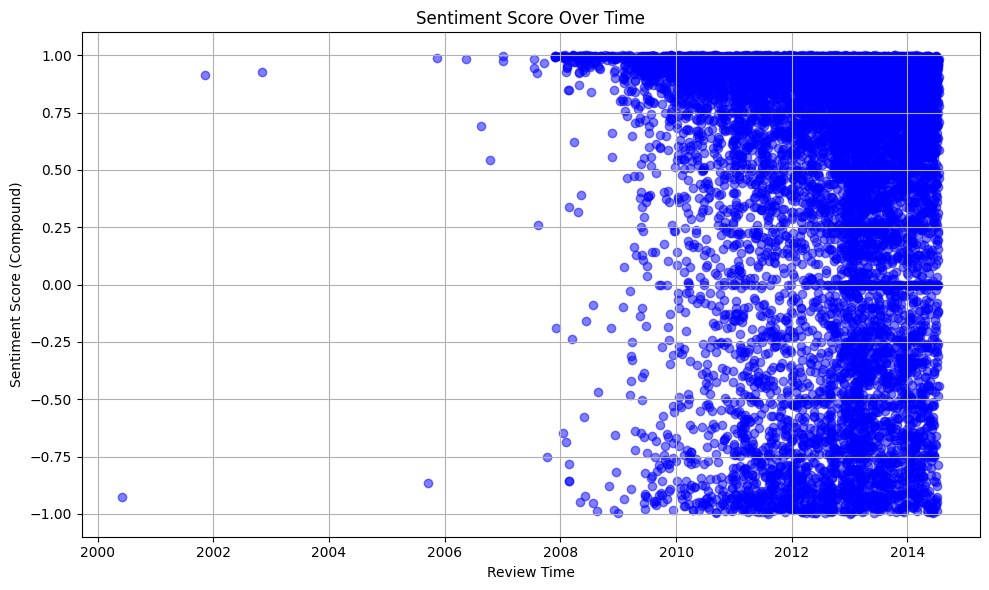

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['reviewTime'], df['review_compound'], alpha=0.5, c='blue')
plt.title('Sentiment Score Over Time')
plt.xlabel('Review Time')
plt.ylabel('Sentiment Score (Compound)')
plt.grid(True)
plt.tight_layout()
plt.show()


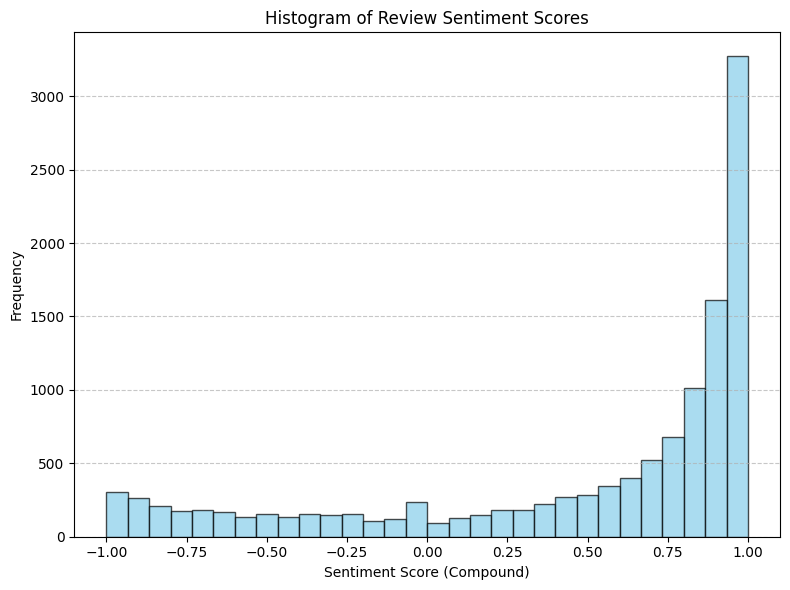

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(df['review_compound'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Review Sentiment Scores')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


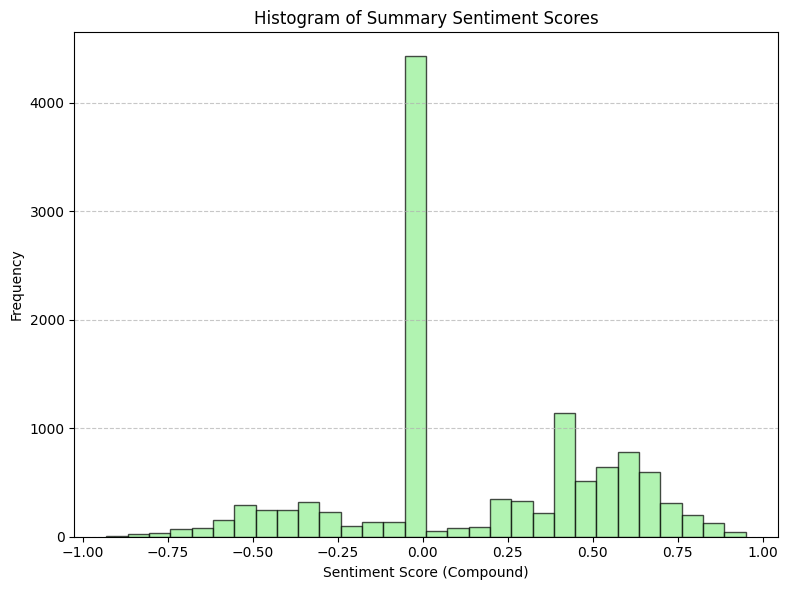

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(df['summary_compound'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histogram of Summary Sentiment Scores')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
